In [1]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Input, Activation, Dropout
import time
import tensorflow as tf
from IPython import display
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier



In [2]:
EPOCHS = 500
noise_dim = 20
BUFFER_SIZE = 60000
BATCH_SIZE = 64
setd1 = 0
setd2 = 0
setd3 = 0
setd4 = 1
setd5 = 1
setd6 = 1
setg1 = 1
setg2 = 1
setg3 = 1
setg4 = 0
setg5 = 0
setg6 = 0

In [3]:
images = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/AX_deformed40(SZ1000_DF20_H1).npy', allow_pickle=True)
images = images.reshape(images.shape[1], 64, 64, 1)
# images = (images +1) / 2  # Normalize the images to [0, 1]

# train_images = train_images[0:10,:,:,:]


In [4]:
train_images = images[0:500,:,:,:]
validation = images[800:images.shape[0],:,:,:]

In [5]:

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)




In [6]:
weights0 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/weightsL0.npy') 
bias0 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/biasL0.npy')

weights4 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/weightsL4.npy') 
bias4 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/biasL4.npy')

weights7 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/weightsL7.npy') 
bias7 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/biasL7.npy')

weights10 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/weightsL10.npy') 
bias10 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/biasL10.npy')

weights13 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/weightsL13.npy') 
bias13 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/biasL13.npy')

weights16 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/weightsL16.npy') 
bias16 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/biasL16.npy')



dweights0 =np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dweightsL0.npy')
dbias0 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dbiasL0.npy')

dweights3 =np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dweightsL3.npy')
dbias3 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dbiasL3.npy')

dweights7 =np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dweightsL7.npy')
dbias7 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dbiasL7.npy')

dweights11 =np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dweightsL11.npy')
dbias11 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dbiasL11.npy')

dweights15 =np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dweightsL15.npy')
dbias15 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dbiasL15.npy')

dweights20 =np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dweightsL20.npy')
dbias20 = np.load('C:/Users/yiqin/OneDrive/Desktop/Data/dbiasL20.npy')


In [7]:
def make_generator_model(noise_dim):
    model = Sequential([
        # Start with a Dense layer that takes the latent vector as input
        Dense(4*4*1024, input_dim=noise_dim),
        Reshape((4, 4, 1024)),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        
        
        # Upsample to 8x8
        Conv2DTranspose(512, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
       
        
        # Upsample to 16x16
        Conv2DTranspose(256, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        
        
        # Upsample to 32x32
        Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        
        
        # Upsample to 64x64
        Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        
        
        # Output layer with tanh activation
        Conv2DTranspose(1, kernel_size=4, strides=1, padding='same', activation='tanh')
    ])
    return model

In [8]:
generator = make_generator_model(noise_dim)

noise = tf.random.normal([1, noise_dim])
generated_image = generator(noise, training=False)

# plt.imshow(generated_image[0, :, :, 0])
if setg1 == 1:
    generator.layers[0].set_weights([weights0,bias0])
    generator.layers[0].trainable = False  
if setg2 == 1:
    generator.layers[4].set_weights([weights4,bias4])
    generator.layers[4].trainable = False  

if setg3 == 1:
    generator.layers[7].set_weights([weights7,bias7])
    generator.layers[7].trainable = False 
if setg4 == 1:
    generator.layers[10].set_weights([weights10,bias10])
    generator.layers[10].trainable = False 
if setg5 == 1:
    generator.layers[13].set_weights([weights13,bias13])
    generator.layers[13].trainable = False 
if setg6 == 1:
    generator.layers[16].set_weights([weights16,bias16])
    generator.layers[16].trainable = False 



In [9]:
def make_discriminator_model():
    model = Sequential([
        # Input layer
        Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=[64, 64, 1]),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),  # Dropout layer added
        
        # Downsample to 32x32
        Conv2D(128, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),  # Dropout layer added
        
        # Downsample to 16x16
        # Conv2D(256, kernel_size=4, strides=1, padding='same'),
        # BatchNormalization(),
        # LeakyReLU(alpha=0.2),
        # Dropout(0.3),  # Dropout layer added

         Conv2D(256, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),  # Dropout layer added
        
        # Downsample to 8x8
        Conv2D(512, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),  # Dropout layer added

        Conv2D(1024, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),  # Dropout layer added
        
        # Output layer
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

In [10]:
discriminator = make_discriminator_model()

In [11]:

input_shape = tf.TensorShape([None, 64, 64, 1])  # to define h, w, c based on shape of layer input
discriminator.build(input_shape)
if setd1 == 1:
    discriminator.layers[0].set_weights([dweights0,dbias0])
    discriminator.layers[0].trainable = False  
if setd2 == 1:
    discriminator.layers[3].set_weights([dweights3,dbias3])
    discriminator.layers[3].trainable = False  
if setd3 == 1:
    discriminator.layers[7].set_weights([dweights7,dbias7])
    discriminator.layers[7].trainable = False  
if setd4 == 1:
    discriminator.layers[11].set_weights([dweights11,dbias11])
    discriminator.layers[11].trainable = False  
if setd5 == 1:
    discriminator.layers[15].set_weights([dweights15,dbias15])
    discriminator.layers[15].trainable = False  
if setd6 == 1:
    discriminator.layers[20].set_weights([dweights20,dbias20])
    discriminator.layers[20].trainable = False  

decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.49051932]], shape=(1, 1), dtype=float32)


In [12]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [13]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [14]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [15]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4,0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4,0.5)

In [16]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [17]:

num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [18]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
tf.config.run_functions_eagerly(True)
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


    #print(f"Generator loss: {gen_loss},Discriminator loss: {disc_loss}")
    return gen_loss, disc_loss

In [19]:
def train(dataset, epochs):
    gen_loss_history = []
    disc_loss_history = []
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)
            gen_loss, disc_loss = train_step(image_batch)
            gen_loss_history.append(gen_loss.numpy())
            disc_loss_history.append(disc_loss.numpy())

        # Produce images for the GIF as you go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                             epoch + 1,
                             seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
          checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)
    plt.plot(gen_loss_history)
    plt.title("Generator Loss During Training")
    plt.xlabel("Training Steps")
    plt.ylabel("Generator Loss")
    plt.show()

    plt.plot(disc_loss_history)
    plt.title("Discriminator Loss During Training")
    plt.xlabel("Training Steps")
    plt.ylabel("Discriminator Loss")
    plt.show()

In [20]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).

            
        
    
    predictions = model(test_input, training=False)
#     import pdb
#     pdb.set_trace()

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0]>0)
      plt.axis('off')

    
    plt.show()

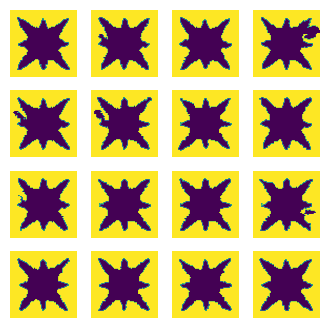

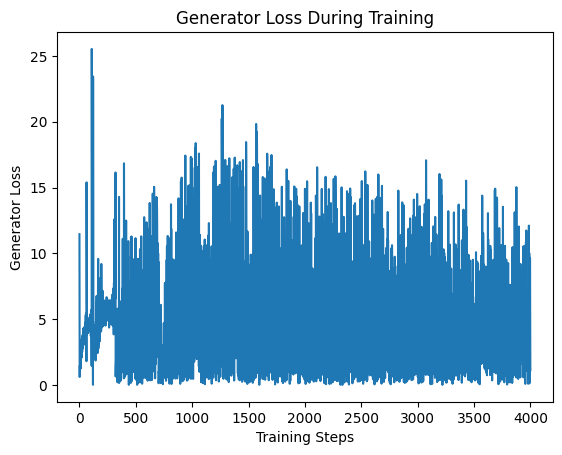

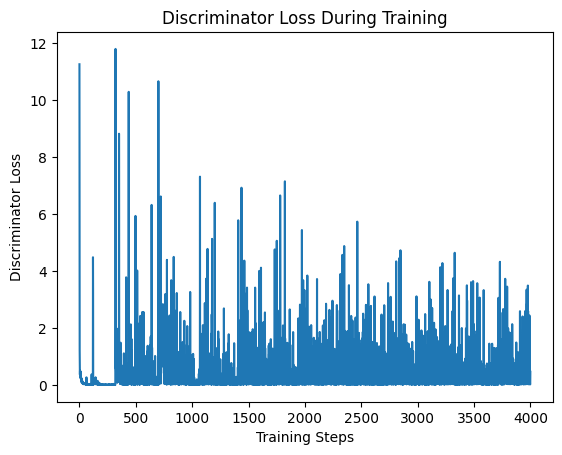

In [21]:
train(train_dataset, EPOCHS)

In [22]:
noise = np.random.normal(0,1,[200,noise_dim])
noise
predicted_data = generator.predict(noise)

C:\Users\yiqin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 2s 91ms/step


In [23]:
#generator.summary()


In [24]:
# discriminator.summary()




In [25]:
nrows=5
ncols=5

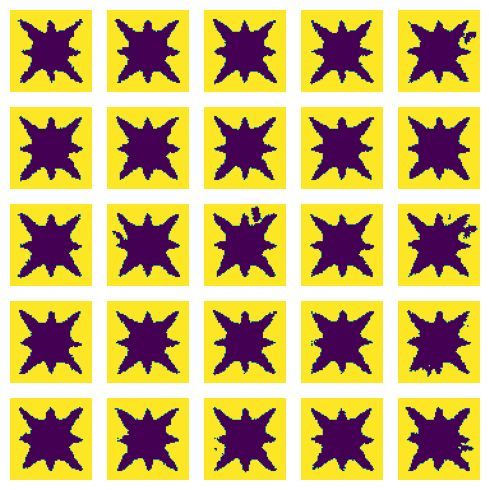

In [26]:
fig, axes = plt.subplots(nrows, ncols, figsize=(5, 5))

# Iterate over the grid and plot each subplot
for i in range(nrows):
    for j in range(ncols):
        # Select the subplot
        ax = axes[i, j]

        # Plot the image
        ax.imshow(predicted_data[10*i+j]>0)  # 'cmap' can be adjusted depending on your data

        # Optionally, remove the axis labels for clarity
        ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

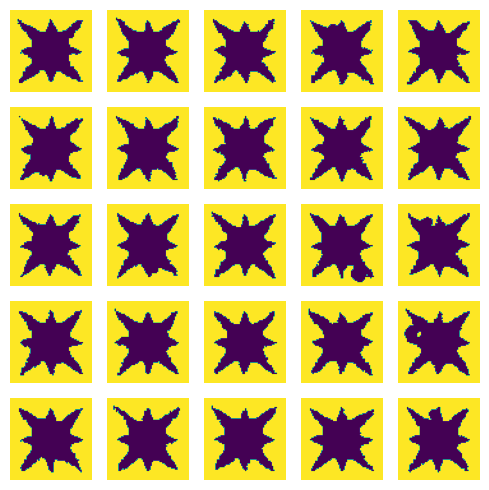

In [27]:
fig, axes = plt.subplots(nrows, ncols, figsize=(5, 5))

# Iterate over the grid and plot each subplot
for i in range(nrows):
    for j in range(ncols):
        # Select the subplot
        ax = axes[i, j]

        # Plot the image
        ax.imshow(train_images[10*i+j]>0)  # 'cmap' can be adjusted depending on your data

        # Optionally, remove the axis labels for clarity
        ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [28]:
from sklearn import metrics

def mmd_linear(X, Y):
    """MMD using linear kernel (i.e., k(x,y) = <x,y>)
    Note that this is not the original linear MMD, only the reformulated and faster version.
    The original version is:
        def mmd_linear(X, Y):
            XX = np.dot(X, X.T)
            YY = np.dot(Y, Y.T)
            XY = np.dot(X, Y.T)
            return XX.mean() + YY.mean() - 2 * XY.mean()

    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]

    Returns:
        [scalar] -- [MMD value]
    """
    delta = X.mean(0) - Y.mean(0)
    return delta.dot(delta.T)


def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))

    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]

    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})

    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()


def mmd_poly(X, Y, degree=2, gamma=1, coef0=0):
    """MMD using polynomial kernel (i.e., k(x,y) = (gamma <X, Y> + coef0)^degree)

    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]

    Keyword Arguments:
        degree {int} -- [degree] (default: {2})
        gamma {int} -- [gamma] (default: {1})
        coef0 {int} -- [constant item] (default: {0})

    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.polynomial_kernel(X, X, degree, gamma, coef0)
    YY = metrics.pairwise.polynomial_kernel(Y, Y, degree, gamma, coef0)
    XY = metrics.pairwise.polynomial_kernel(X, Y, degree, gamma, coef0)
    return XX.mean() + YY.mean() - 2 * XY.mean()

# a = validation
if __name__ == '__main__':


    a = predicted_data.reshape(-1,64,64)
    b = validation.reshape(validation.shape[0],64,64)
    # a = images[0:200,:,:].reshape(200,128,128)

In [29]:
count = 0
lineartotal = 0
polytotal = 0
rbftotal = 0
for i in a:
    for j in b:
        linear = mmd_linear(i, j)
        rbf = mmd_rbf(i, j)
        poly = mmd_poly(i, j)
        count = count +1
        lineartotal = lineartotal + linear
        polytotal = polytotal + poly
        rbftotal = rbftotal + rbf

mean_linear = lineartotal/count
mean_poly = polytotal/count
mean_rbf = rbftotal/count

In [30]:
import numpy as np
from scipy.linalg import sqrtm
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
import tensorflow as tf

def calculate_fid(model, images1, images2):
    # Calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    
    # Calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)
    
    # Add small value to diagonal of cov matrices to improve stability
    sigma1 += np.eye(sigma1.shape[0]) * 1e-6
    sigma2 += np.eye(sigma2.shape[0]) * 1e-6
    
    # Calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    
    # Calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    
    # Check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    
    # Calculate score
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid


def preprocess_images_for_fid(images, target_size=(299, 299)):
    processed_images = []
    for image in images:
        # Resize the image
        image = tf.image.resize(image, target_size)
        # Convert grayscale to RGB by repeating the channels
        image = tf.image.grayscale_to_rgb(image)
        # Normalize the image to [-1, 1] to match the InceptionV3 preprocessing
        image = preprocess_input(image)
        processed_images.append(image)
    processed_images = np.stack(processed_images)
    return processed_images

# Assuming `real_images` and `generated_images` are your datasets each with the shape (200, 64, 64, 1)
# For demonstration, let's create dummy datasets:
real_images = (validation) * 255
generated_images = (predicted_data) * 255

# Preprocess the images for InceptionV3
images_real_preprocessed = preprocess_images_for_fid(real_images)
images_fake_preprocessed = preprocess_images_for_fid(generated_images)

# Load InceptionV3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

# Calculate FID
fid = calculate_fid(model, images_real_preprocessed, images_fake_preprocessed)
print(f'FID score: {fid}')


C:\Users\yiqin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 1s 102ms/step
FID score: 22.423767449887926


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# images_standardized_a = scaler.fit_transform(a_flat)

# # Initialize PCA, choosing to preserve 95% of the variance

a_flat = a.reshape(200, -1)
b_flat = b.reshape(200, -1)
# images_standardized_b = scaler.fit_transform(b_flat)

# Initialize PCA, choosing to preserve 95% of the variance
pca_b = PCA(n_components=2)

# Fit PCA on the dataset
pca_b.fit(a_flat)

# Transform the data according to the PCA fit
images_pca_b = pca_b.transform(b_flat)

pca_a = PCA(n_components=2)

# Fit PCA on the dataset
pca_a.fit(a_flat)

# Transform the data according to the PCA fit
images_pca_a = pca_a.transform(a_flat)

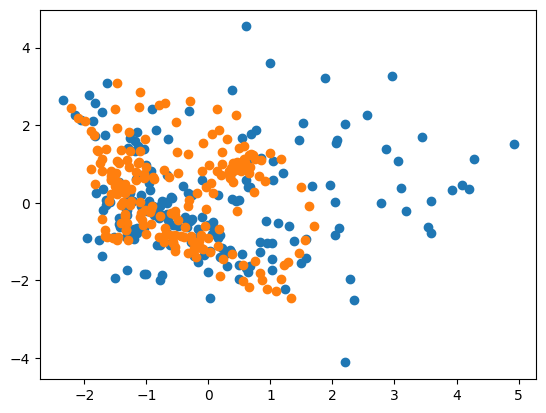

In [32]:
plt.scatter(images_pca_a[:,0],images_pca_a[:,1])
plt.scatter(images_pca_b[:,0],images_pca_b[:,1])

In [33]:
def xor_metric(x, y):
    return np.sum(np.logical_xor(x, y))


# a = np.random.rand(200,128,128)*2-1
# b = np.random.rand(200,128,128)*2-1
# a = a>0
# b = b>0
# a_flat = a.reshape(200, -1)
# b_flat = b.reshape(200, -1)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( a_flat, b_flat, test_size=0.2, random_state=4)
# print ('Train set:', X_train.shape,  y_train.shape)
# print ('Test set:', X_test.shape,  y_test.shape)
k = 2
#Train Model and Predict
stacked = np.vstack((images_pca_a,images_pca_b))
neigh = NearestNeighbors(n_neighbors = k, metric='euclidean').fit(stacked)
distances, indices = neigh.kneighbors(images_pca_b)


In [34]:
num_a = len(a_flat)  # Number of rows in a_flat
asample = 0
bsample = 0
for row in indices:
    for idx in row:
        if idx < num_a:
            asample = asample+1
        

accuracy = (asample)/200

accuracy

0.455

In [35]:
import matlab.engine
eng = matlab.engine.start_matlab()
# eng.addpath('C:/Users/yiqin/OneDrive/Desktop/Matlab/HOMOPBC.m')


In [36]:
vFab = []
vPred = []
Predicted = predicted_data.reshape(predicted_data.shape[0], 64,64)
binary_matrix = Predicted > 0
# Loop over the first dimension of Predicted
for i in range(Predicted.shape[0]):
    v1 = eng.HOMOPBC(matlab.double(binary_matrix[i,:,:].tolist()))
    vPred.append(v1)  # Append the result to vPred


binary_matrix1 = b > 0
# Loop over the first dimension of Predicted
for i in range(b.shape[0]):
    v2 = eng.HOMOPBC(matlab.double(binary_matrix1[i,:,:].tolist()))
    vFab.append(v2)  # Append the result to vPred


np.mean(vPred)


0.09328647856227608

In [37]:
np.mean(vFab)

0.09047944601090474

In [38]:
from scipy.stats import wasserstein_distance
from scipy.io import loadmat

In [39]:
distance = wasserstein_distance(vPred,vFab)

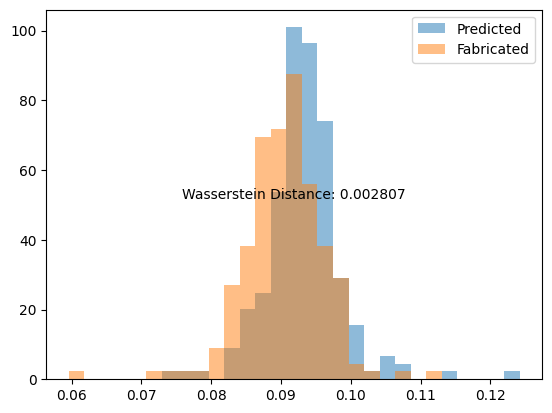

In [40]:
bins = np.linspace(min(min(vPred), min(vFab)), max(max(vPred), max(vFab)), 30)
hist_pred, _ = np.histogram(vPred, bins=bins, density=True)
hist_fab, _ = np.histogram(vFab, bins=bins, density=True)



# Plot histograms
plt.hist(vPred, bins=bins, alpha=0.5, label='Predicted', density=True)
plt.hist(vFab, bins=bins, alpha=0.5, label='Fabricated', density=True)



# Annotate Wasserstein distance
plt.text(0.5, 0.5, f'Wasserstein Distance: {distance:.6f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Show legend
plt.legend()

# Show the plot
plt.show()

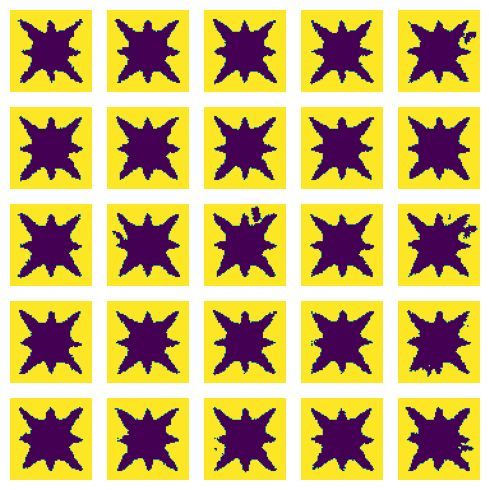

In [41]:
fig, axes = plt.subplots(nrows, ncols, figsize=(5, 5))

# Iterate over the grid and plot each subplot
for i in range(nrows):
    for j in range(ncols):
        # Select the subplot
        ax = axes[i, j]

        # Plot the image
        ax.imshow(predicted_data[10*i+j]>0)  # 'cmap' can be adjusted depending on your data

        # Optionally, remove the axis labels for clarity
        ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [42]:
print(f'FID score: {fid}')
print(f'MMD: {mean_poly}')
print(f'1NN Acurracy: {accuracy}')
print(f'Wasserstein Distance: {distance:.6f}')

FID score: 22.423767449887926
MMD: 1.0447021041248254
1NN Acurracy: 0.455
Wasserstein Distance: 0.002807
